# GLWT (supervised pretraining) MNIST

**Atividade PEL219 - GLWT MNIST - Gabriel Melo. Matrícula: 125.304-6**

For this exercise I've used the greedy layer wise supervised pre-training methodology.

You can find the full technique on:

1. Ian Goodfellow and Yoshua Bengio and Aaron Courville. Deep Learning. MIT Press. page: 319-321
2. Yoshua Bengio, Pascal Lamblin, Dan Popovici, Hugo Larochelle, 2007. Greedy Layer-Wise Training of Deep Networks.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

2025-11-17 21:17:38.515740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 21:17:38.558201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 21:17:39.689779: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = to_categorical(y_train)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000,))

In [4]:
def train_glwt(model: Sequential, X: np.array, Y: np.array, optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy", _epochs=10, _validation_split=.1):
    histories = []
    layers = [480, 128, 40]
    
    for layer_size in layers:
        model.pop() # throw away output layer

        for layer in model.layers: # lock all layers weights
            layer.trainable=False

        model.add(Dense(layer_size, activation="relu"))  # add trainable hidden layers

        model.add(Dense(10, activation="softmax"))  # add output layer (will be discarded if not last hidden)

        model.compile(optimizer, loss, metrics=[metrics])
        
        histories.append(model.fit(x=x_train, y=y_train, epochs=_epochs, validation_split=_validation_split))

    return histories

In [5]:
# Creating a initial model
histories = []
optimizer = "adam"
loss="categorical_crossentropy"
metrics="categorical_accuracy"
model = Sequential() 
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(785, activation="relu"))
model.add(Dense(10, activation="softmax"))  # digit numbers
model.compile(optimizer, loss, metrics=[metrics])
histories.append(
    model.fit(x=x_train, y=y_train, epochs=10, validation_split=.1)
    )


/home/melo/coding/machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-17 21:17:40.130815: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9399 - loss: 0.2006 - val_categorical_accuracy: 0.9737 - val_loss: 0.0859
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9750 - loss: 0.0802 - val_categorical_accuracy: 0.9753 - val_loss: 0.0807
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9834 - loss: 0.0512 - val_categorical_accuracy: 0.9778 - val_loss: 0.0804
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9877 - loss: 0.0358 - val_categorical_accuracy: 0.9808 - val_loss: 0.0693
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9911 - loss: 0.0272 - val_categorical_accuracy: 0.9827 - val_loss: 0.0623
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9933 - loss: 0.0210 - val_categorical_accuracy: 0.9792 - val_loss: 0.0777
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

In [6]:
histories.extend(train_glwt(model, x_train, y_train))


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9873 - loss: 0.0392 - val_categorical_accuracy: 0.9755 - val_loss: 0.1232
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.9953 - loss: 0.0162 - val_categorical_accuracy: 0.9825 - val_loss: 0.0908
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9974 - loss: 0.0088 - val_categorical_accuracy: 0.9832 - val_loss: 0.1119
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.9972 - loss: 0.0106 - val_categorical_accuracy: 0.9842 - val_loss: 0.1237
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9977 - loss: 0.0079 - val_categorical_accuracy: 0.9812 - val_loss: 0.1599
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9982 - loss: 0.0078 - val_categorical_accuracy: 0.9867 - val_loss: 0.1280
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

## Testing

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 785)            │       616,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 480)            │       377,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        61,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,785 (4.09 MB)

 Trainable params: 5,570 (21.76 KB)

 Non-trainable params: 1,055,073 (4.02 MB)

 Optimizer params: 11,142 (43.53 KB)

In [15]:
results = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
results_class = np.argmax(results, axis=1)

In [17]:
accuracy_score(results_class, y_test), precision_score(results_class, y_test, average="weighted"), recall_score(results_class, y_test, average="weighted"), f1_score(results_class, y_test, average="weighted")

(0.9836, 0.9836349202666703, 0.9836, 0.9836000578870499)

In [18]:
print(classification_report(y_test, results_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

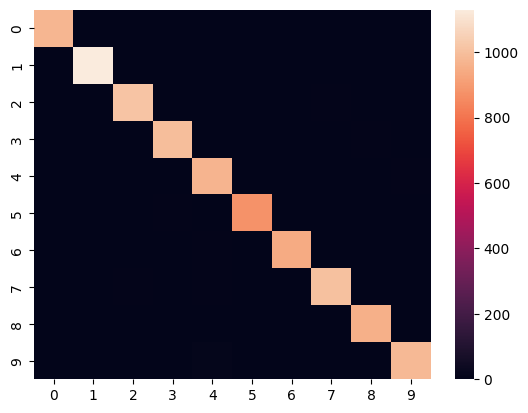

In [19]:
sns.heatmap(confusion_matrix(y_test, results_class))

## Training data (last layer pair only)

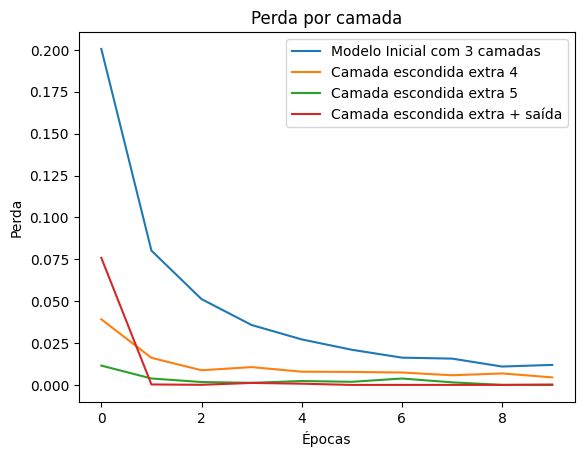

In [20]:
hist = [h.history for h in histories]

fig = plt.subplot(1,1,1)
for i, hist in enumerate(hist):
    if i==0:
        fig.plot(hist['loss'], label=f'Modelo Inicial com 3 camadas')
    elif i==3:
        fig.plot(hist['loss'], label=f'Camada escondida extra + saída')
    else:
        fig.plot(hist['loss'], label=f'Camada escondida extra {i+3}')
        
plt.title("Perda por camada")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.show()